In [7]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

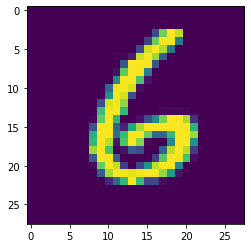

In [5]:
plt.imshow(x_train[6000])     #ploting the index=image

In [8]:
np.argmax(y_train[6000])

0

In [9]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')


In [10]:
number_of_classes = 10

In [11]:
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [12]:
model=Sequential ()

In [13]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(number_of_classes,activation = 'softmax'))

In [16]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [17]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [18]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.2575 - accuracy: 0.9478 - val_loss: 0.0806 - val_accuracy: 0.9778
Epoch 2/5
1875/1875 [==============================] - 207s 111ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0894 - val_accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 209s 112ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 211s 113ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0895 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0901 - val_accuracy: 0.9780


In [19]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09010377526283264, 0.9779999852180481]


In [24]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 25ms/step
[[1.59544591e-08 2.33073371e-16 2.34239184e-09 1.62974970e-07
  5.09541457e-16 1.13236616e-15 5.18489877e-18 9.99999881e-01
  5.54174207e-11 1.55327928e-08]
 [3.29281719e-12 2.02800288e-09 1.00000000e+00 1.76431680e-09
  1.03070385e-17 1.39240729e-18 7.64054864e-09 2.21294719e-18
  6.70888056e-09 1.22928668e-19]
 [8.42643385e-06 9.99320745e-01 9.68752556e-06 1.53631765e-06
  7.63119606e-05 1.95310051e-07 3.20576805e-06 1.65491895e-06
  5.76158694e-04 2.00176487e-06]
 [9.99999762e-01 2.90615351e-13 9.90565182e-12 1.70740361e-13
  3.99094576e-13 1.08458936e-11 2.15349829e-07 5.29885939e-15
  1.02952902e-09 9.11432096e-10]]


In [26]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09010377526283264, 0.9779999852180481]


In [27]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 23ms/step
[[1.59544591e-08 2.33073371e-16 2.34239184e-09 1.62974970e-07
  5.09541457e-16 1.13236616e-15 5.18489877e-18 9.99999881e-01
  5.54174207e-11 1.55327928e-08]
 [3.29281719e-12 2.02800288e-09 1.00000000e+00 1.76431680e-09
  1.03070385e-17 1.39240729e-18 7.64054864e-09 2.21294719e-18
  6.70888056e-09 1.22928668e-19]
 [8.42643385e-06 9.99320745e-01 9.68752556e-06 1.53631765e-06
  7.63119606e-05 1.95310051e-07 3.20576805e-06 1.65491895e-06
  5.76158694e-04 2.00176487e-06]
 [9.99999762e-01 2.90615351e-13 9.90565182e-12 1.70740361e-13
  3.99094576e-13 1.08458936e-11 2.15349829e-07 5.29885939e-15
  1.02952902e-09 9.11432096e-10]]


In [28]:
model.save('models/mnistCNN.h5')